# Business Problem: Employee leave the company or not?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
data.shape

(1470, 35)

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Basic Checks

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* We've two columns which has standard deviation equals to zero
* Tthe columns which show standard deviation equals to zero that columns have the constant/unique values and they cannot use for the analysis 

In [9]:
data.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


* Here, Over18 column cannot be used for analysis as it is having constant value.(1 label only)

# Exploratory Data Analysis

### 1.) Univariate Analysis using sweetviz

In [10]:
# import sweetviz as sv

In [11]:
# report = sv.analyze(data)
# report.show_html()

### 2.) Bivariate Analysis using generic python code

### Divide the dataset into subsets :
* data1 for Categorical columns
* data2 for Numerical columns(Continuous)
* data3 for Discrete columns

### # New dataset for Categorical Columns Only:

In [12]:
categorical_col = []

for column in data.columns:
    if data[column].dtype == object:
        categorical_col.append(column)
        print(f"{column}: {data[column].unique()}")
        print('------------------------------------')

Attrition: ['Yes' 'No']
------------------------------------
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
------------------------------------
Department: ['Sales' 'Research & Development' 'Human Resources']
------------------------------------
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
------------------------------------
Gender: ['Female' 'Male']
------------------------------------
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
------------------------------------
MaritalStatus: ['Single' 'Married' 'Divorced']
------------------------------------
Over18: ['Y']
------------------------------------
OverTime: ['Yes' 'No']
------------------------------------


In [13]:
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [14]:
data1=data[['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']]

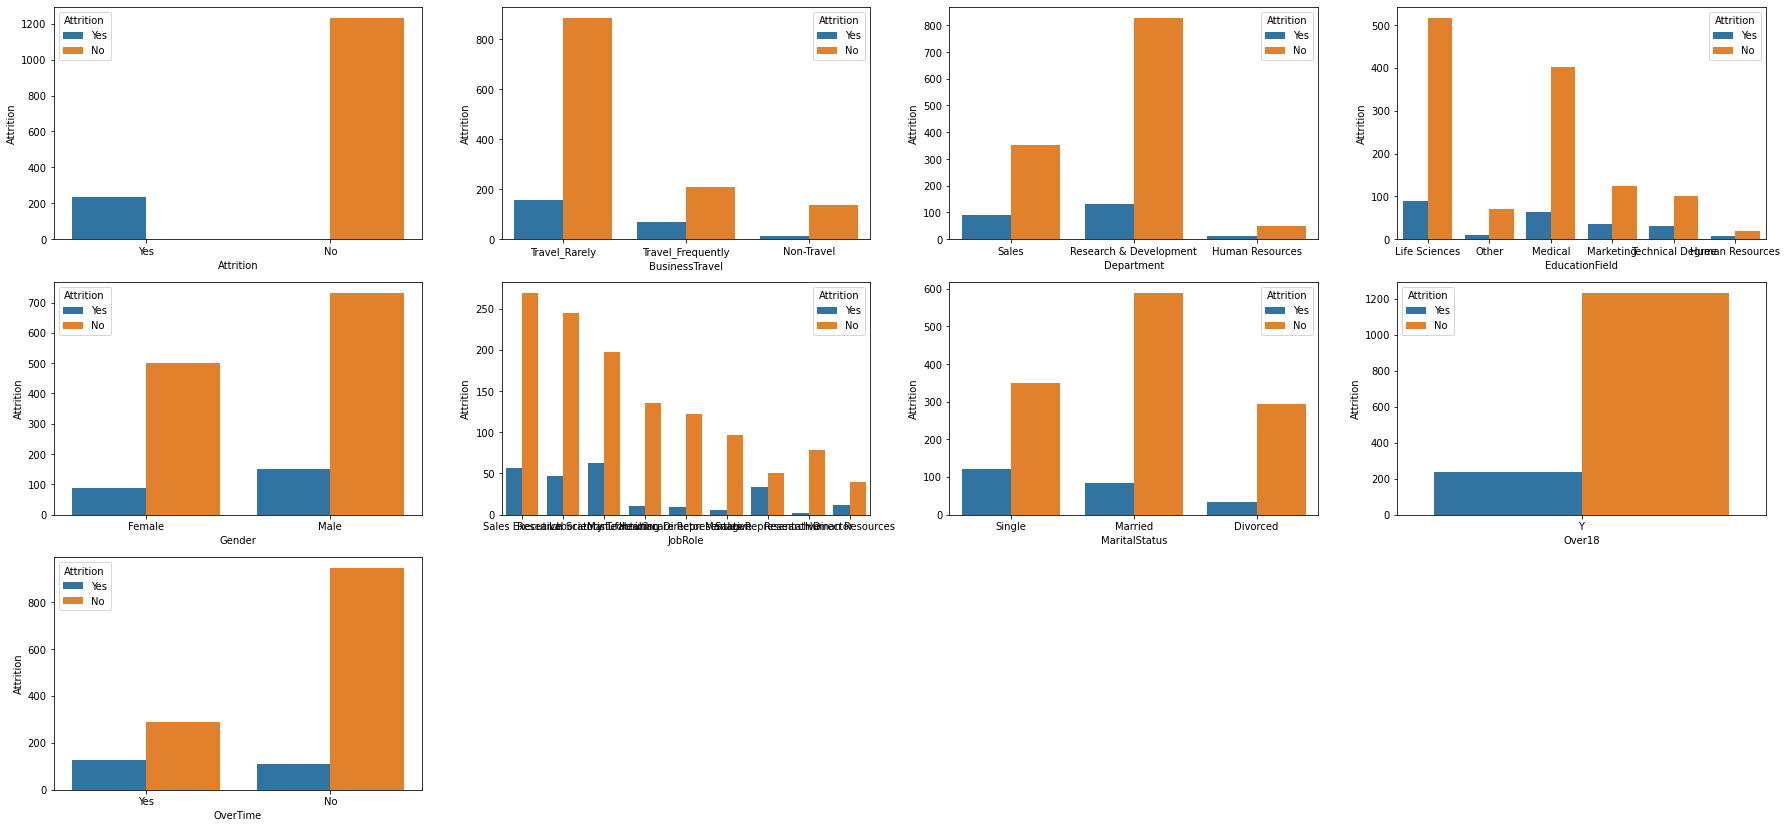

In [15]:
plt.figure(figsize=(25,15))
plotnumber = 1

for column in data1:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        sns.countplot(x=data[column].dropna(axis=0),hue=data.Attrition)
        plt.xlabel(column)
        plt.ylabel('Attrition')
    plotnumber+=1
plt.tight_layout()

Text(0.5, 0, 'JobRole')

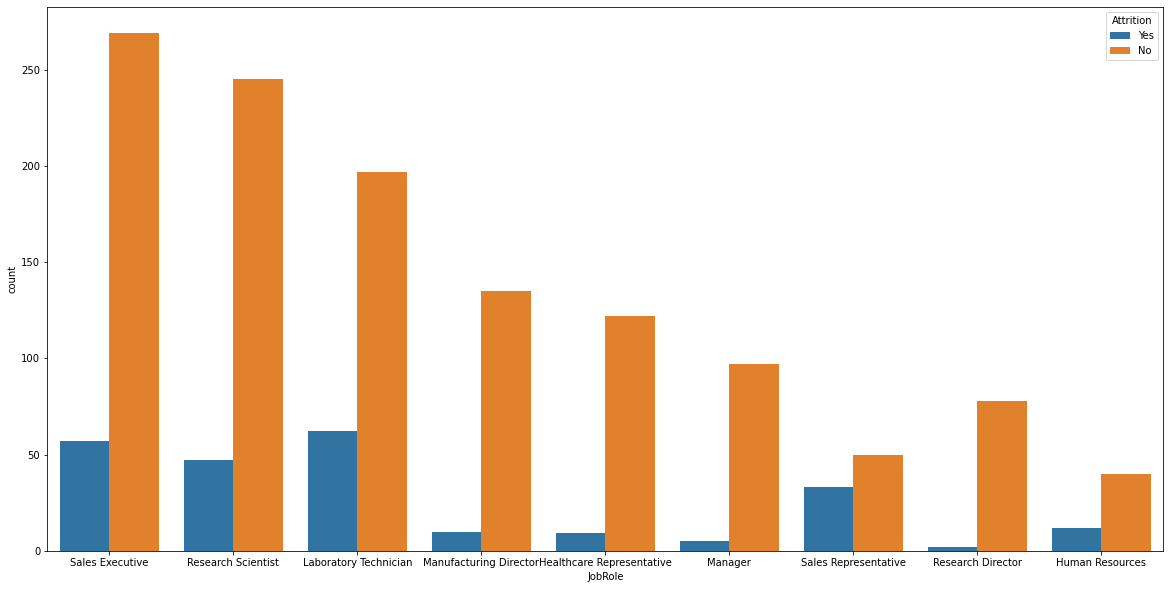

In [16]:
# For job role column we plot graph differently becoz on x-axis the values are messed up above.


plt.figure(figsize=(20,10), facecolor='white')
sns.countplot(x='JobRole',hue='Attrition',data=data1)
plt.xlabel('JobRole',fontsize=10)

### INsights:
1.) Attrition : 
* More number of counts of 'no' and least number of counts of 'yes'. Data is imbalanced.
2.) How Business travel affets Attrition:
* In business travel there are three categorized employees.
* More number of counts we've of Travel rarely category.
* The employees who travel frequently and travel rarely are more likely to quit their job.
3.) Is gender matters for attrition?
* Male employees are more than the females
* And also the males are more likely to quit their job.
4.) OverTime On Attrition:
* Mostly the Employees are not doing overtime.
* The employees who are doing overtime are more likely to quit their job.
* But there are some of the employees who are not doing overtime are also quit their job.
* So, there is no such vast difference in doing overtime or not 
* So, Overtime is not impacting Attrition that much.
5.) Department on Attrition:
* Mostly the employees work in Research & Development department.
* The employees belongs to Sales and Research department are more likely to quit their job.
6.) Education Field:
* The employees are categorized into 6 categories i.e. LifeSciences, Other, Medical,HR,Marketing,Technical Degree.
* Most of the employees are are of Medical and LifeSciences field.
* Comapratively, The employees who are of Medical and Life sciences field are more liekly to quit the job.
7.) Marital Status:
* Singles are more likely to quit their job.
* Most of the employees are Married. and some of them also likely to quit their job.
* The least number of divorced employees like to quit their job.
8.) JobRole:
* There are less number of Research Directors who leave the company.
* Comparatively Sales Executives and Laboratory Technicians are more who leave the company.
* As it can be seen that the max. number of counts are for sales executive job role.

### New dataset for Continuous columns:

In [17]:
continuous_col = []
for column in data.columns:
    if data[column].dtype == 'int64' and len(data[column].unique())>=10:
        continuous_col.append(column)

In [18]:
continuous_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [19]:
data2=data[continuous_col]

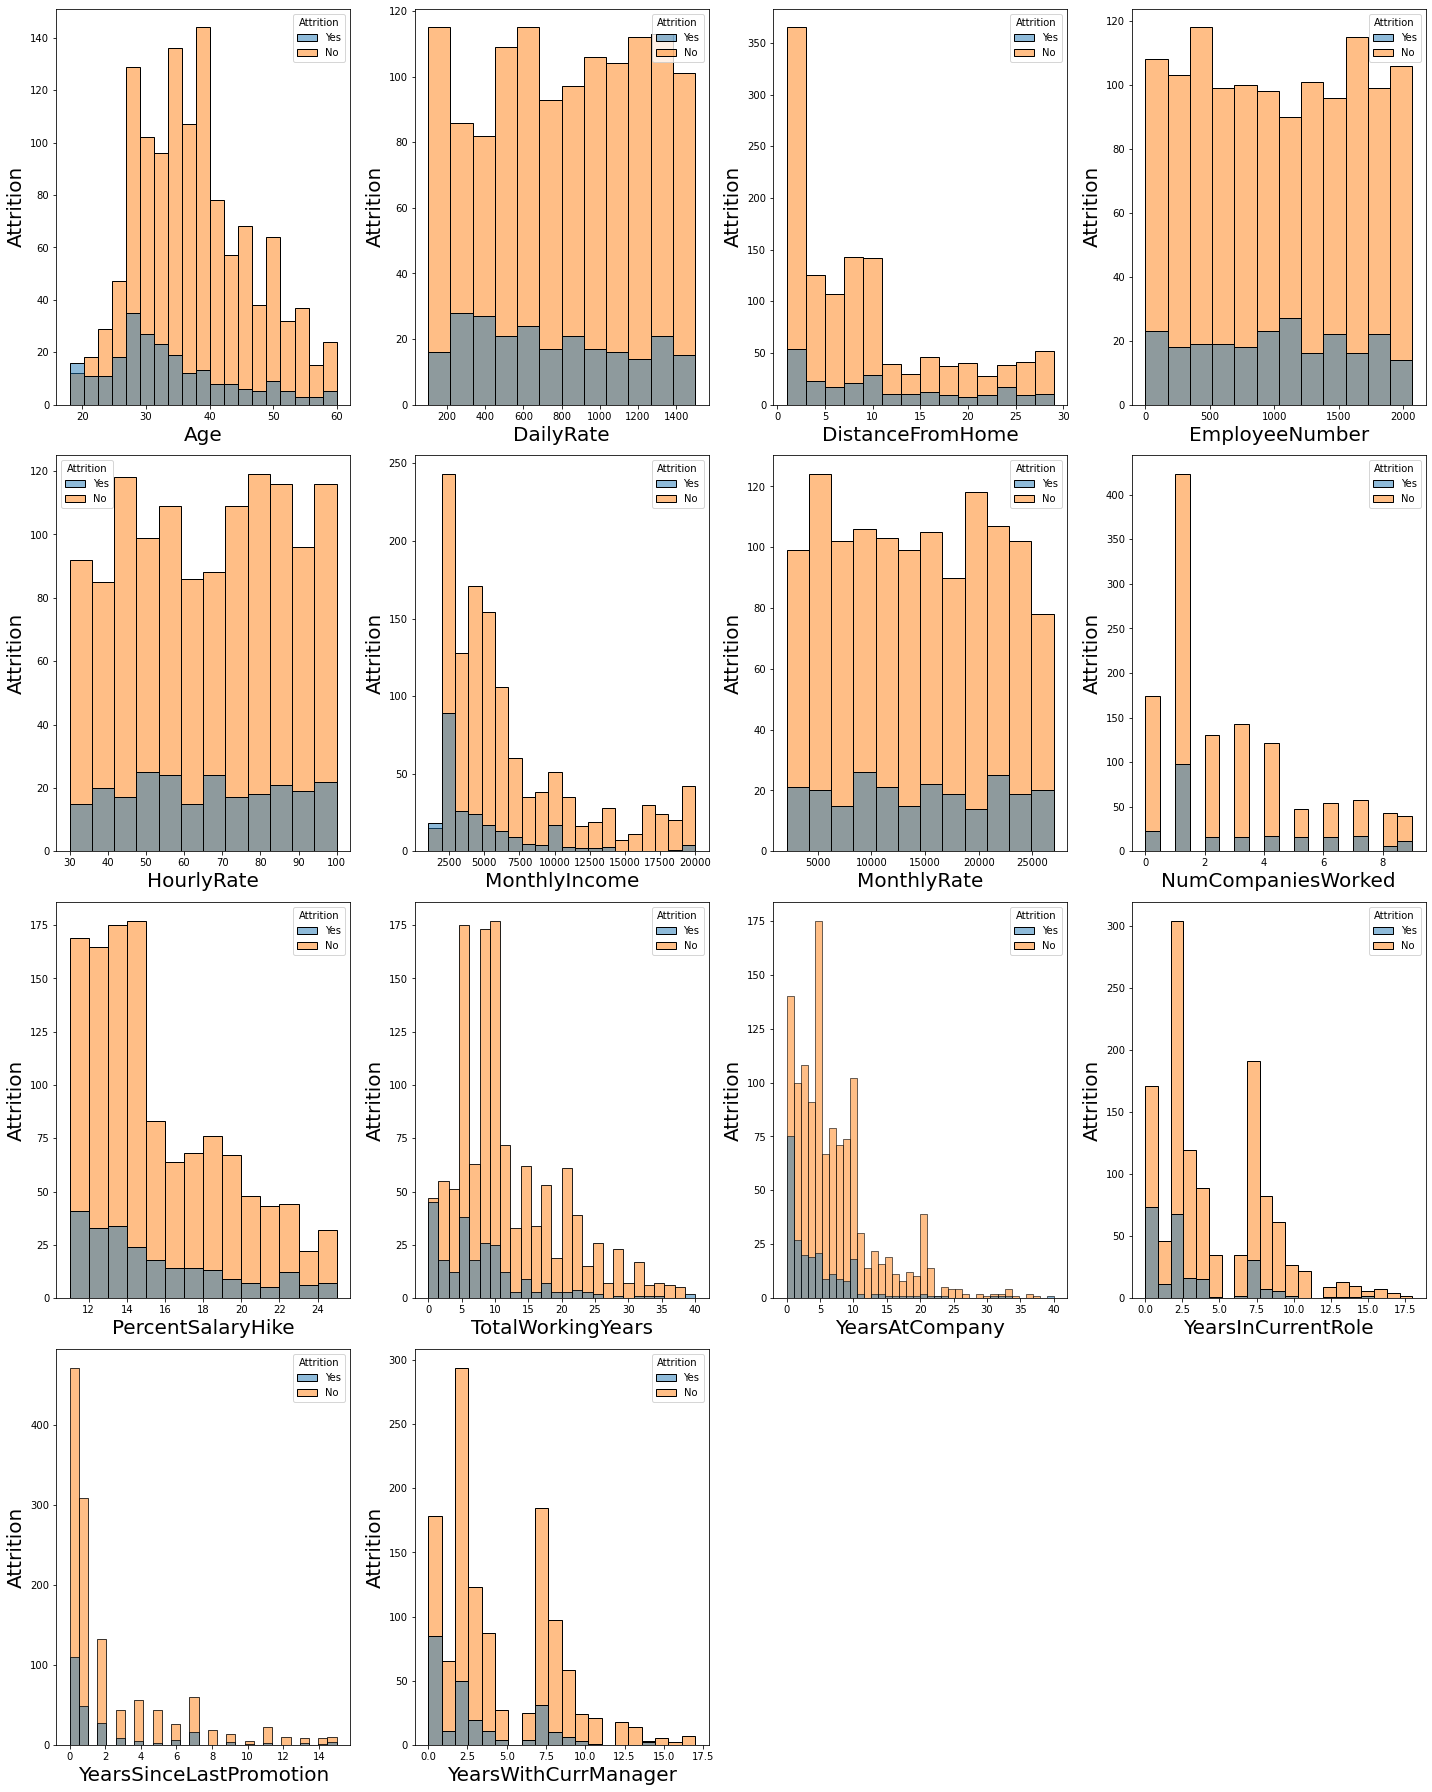

In [20]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data2[column].dropna(axis=0)
                ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## INsightS:
1.) Age:
* Employees of age (25-35) are more likely to quit.
* After 35 age, Higher the age lesser will be the attrition.
2.) DistanceFromHome:
* Employees who live 0-10kms far from the comapny are more likely to leave.
3.) MonthlyIncome:
* Higher the income chances of attrition(Yes) are less.
* Employees whose income approx. 2500 are more likely to quit as it is the min. income.
4.) SalaryHike:
* If more the positive hike in salary tha employee's chances of leaving the company are less.
5.) Years at the company:
* Freshers are more likely to quit.
* Apart from that, Who've the experience of 1-10 years at companies are more likely to quit.
6.) Yeart with Current Manager:
* The employees who've the relationship with their manager of 10 years or more'll not leave the company.


### New Dataset for Discrete Columns:

In [21]:
discrete_col = []
for column in data.columns:
    if data[column].dtype == 'int64' and len(data[column].unique())<=10:
        discrete_col.append(column)

In [22]:
discrete_col

['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [23]:
data3=data[discrete_col]

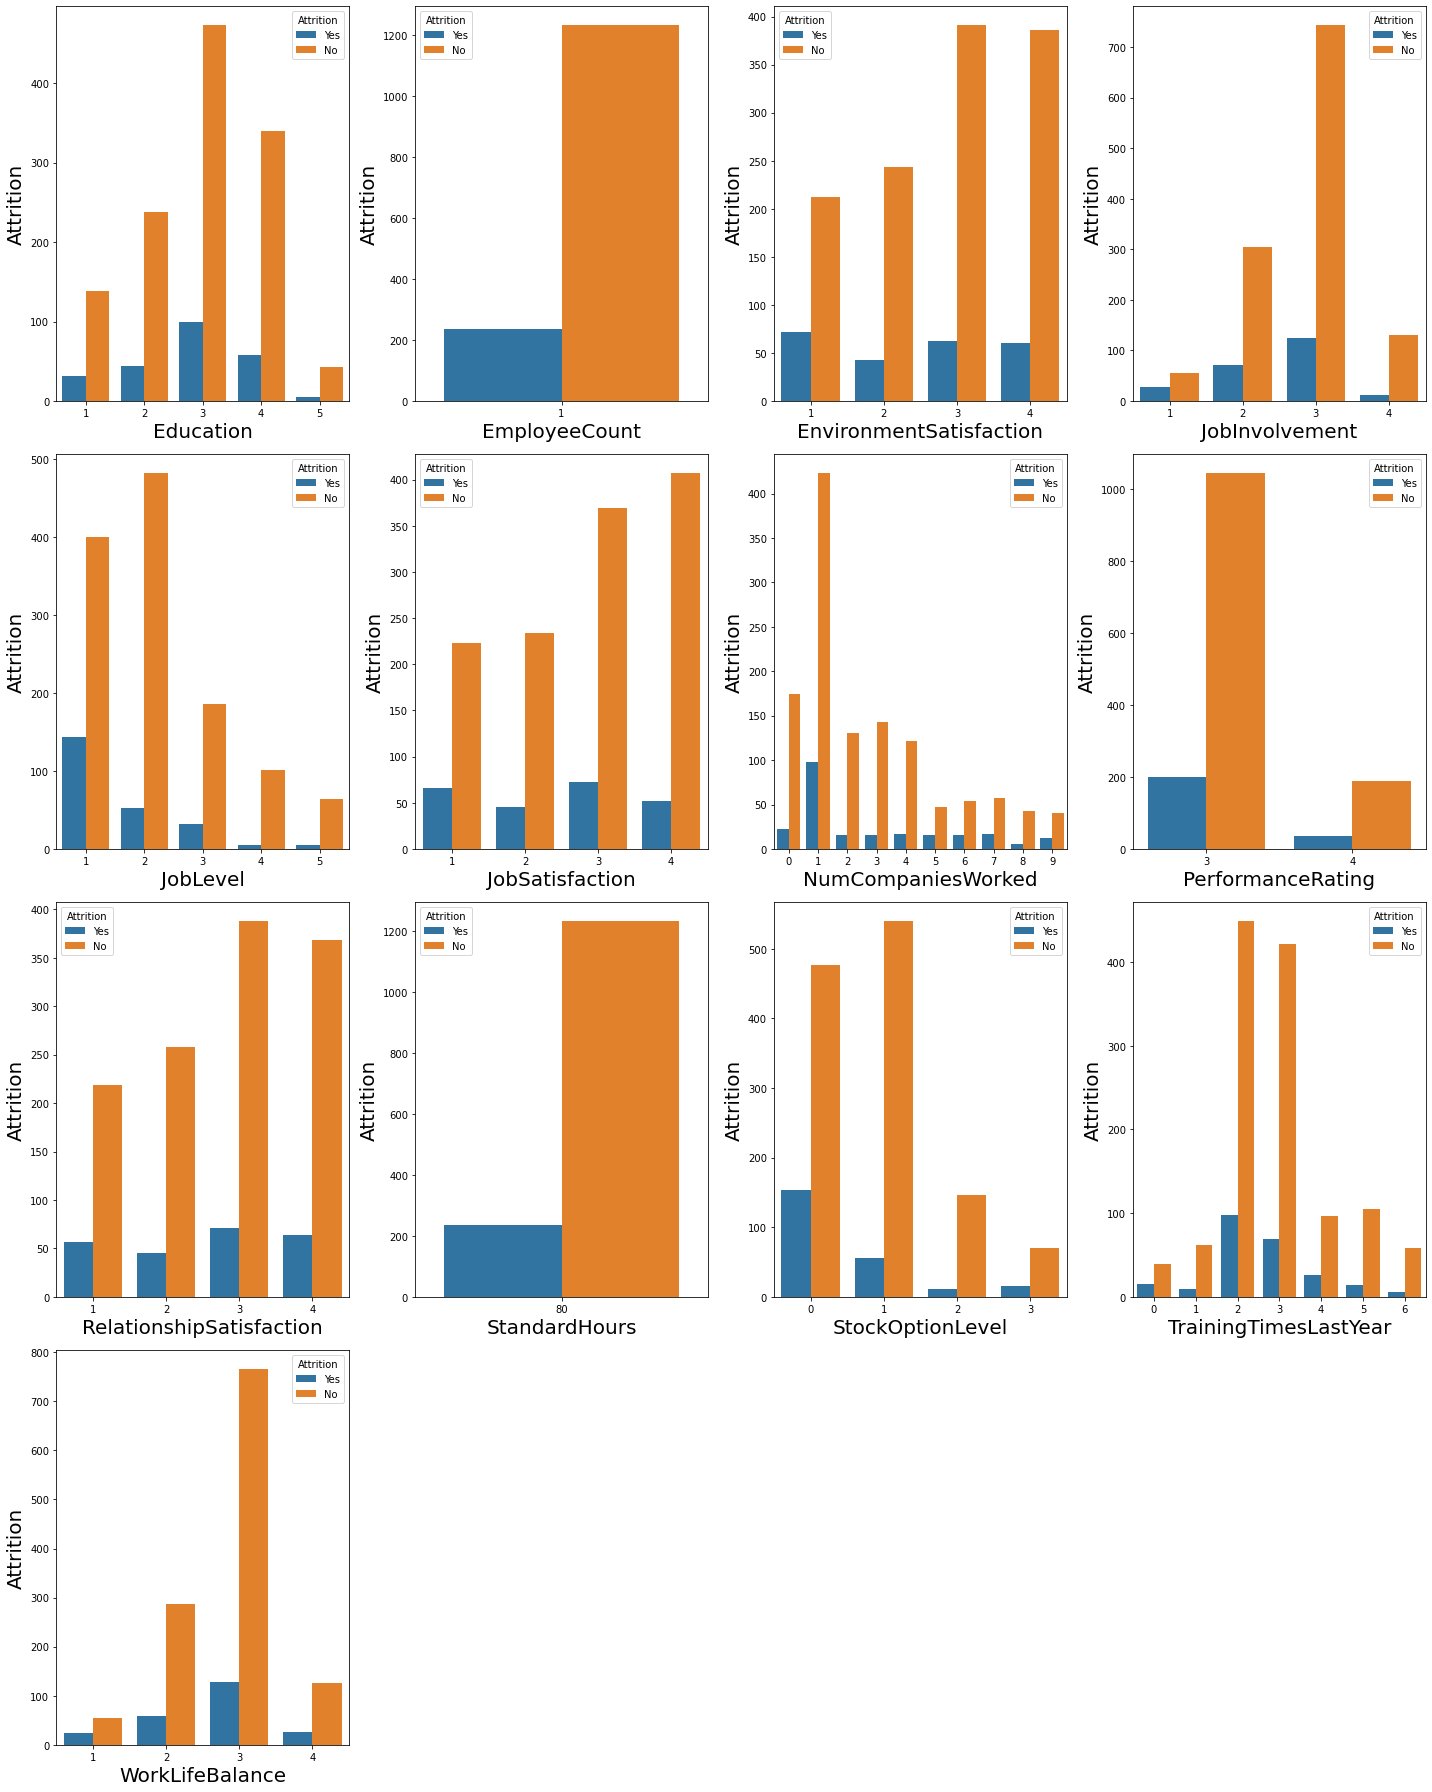

In [24]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data3:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data3[column].dropna(axis=0)
                        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## INsights:
1.) JobInvolvement on Attrition:
* The emoloyees who involved in thier job more than suffiecient are more likely to quit.
* May they're not getting that much good salary.
* Somehow, there are some employees who not involved in their job fully but they're also like to quit.
2.) StockOptionLevel:
* For the employees who're not having any stock option level are more likely decide to quit.
3.) NumCompaniesWorked:
* The employees who've worked for 1 company only are more likely to quit the job.
4.) PerformanceRating:
* On an average, Most of the employees are moderately perform. 
* And more likely to quit than others who permorm extremely well.
5.)WorkLifeBalance:
* Mostly the employees gave their worklifebalance rating in this company to 3.
* Comparatively the employees who mark rating as 3 are more likely to quit.
6.) Environment Satisfaction & Job Satisfaction:
* As the rating increasing the employees thinking about not to leave the company.
7.) JobLevel:
* Joblevel showing indirect linear relationship with Attrition.


# Data Preprocessing:

In [25]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Handling Categorical data:

--> Mannual Encoding on Attrition:

In [3]:
data.Attrition = data.Attrition.map({'Yes':1,'No':0})

In [27]:
data.Attrition.unique()

array([1, 0], dtype=int64)

* Successfully done.

--> Encoding on BusinessTravel, Department, EducationField:

In [4]:
data.BusinessTravel = data.BusinessTravel.map({'Travel_Rarely':1,'Travel_Frequently':2,'Non-Travel':3})

In [5]:
data.Department = data.Department.map({'Research & Development':1,'Sales':2,'Human Resources':3})

In [6]:
data.EducationField = data.EducationField.map({'Life Sciences':1,'Medical':2,'Marketing':3,'Technical Degree':4,'Other':4,'Human Resources':6 })
   

--> Encoding Gender:

In [7]:
data.Gender = pd.get_dummies(data.Gender,drop_first=True)


In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


--> Encoding JobRole:

In [9]:
data.JobRole=data.JobRole.map({'Laboratory Technician':8,'Sales Executive':7,'Research Scientist':6,'Sales Representative':5,
                              'Human Resources':4,'Manufacturing Director':3,'Healthcare Representative':2,
                               'Manager':1,'Research Director':0 })
  
   
  

--> Encoding MaritalStatus:

In [10]:
data.MaritalStatus=data.MaritalStatus.map({'Single':2,'Married':1,'Divorced':0})

--> Encoding OverTime Using LabelEncoder:

In [11]:
data.OverTime = data.OverTime.map({'Yes':1,'No':0})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   uint8 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Feature Selection:

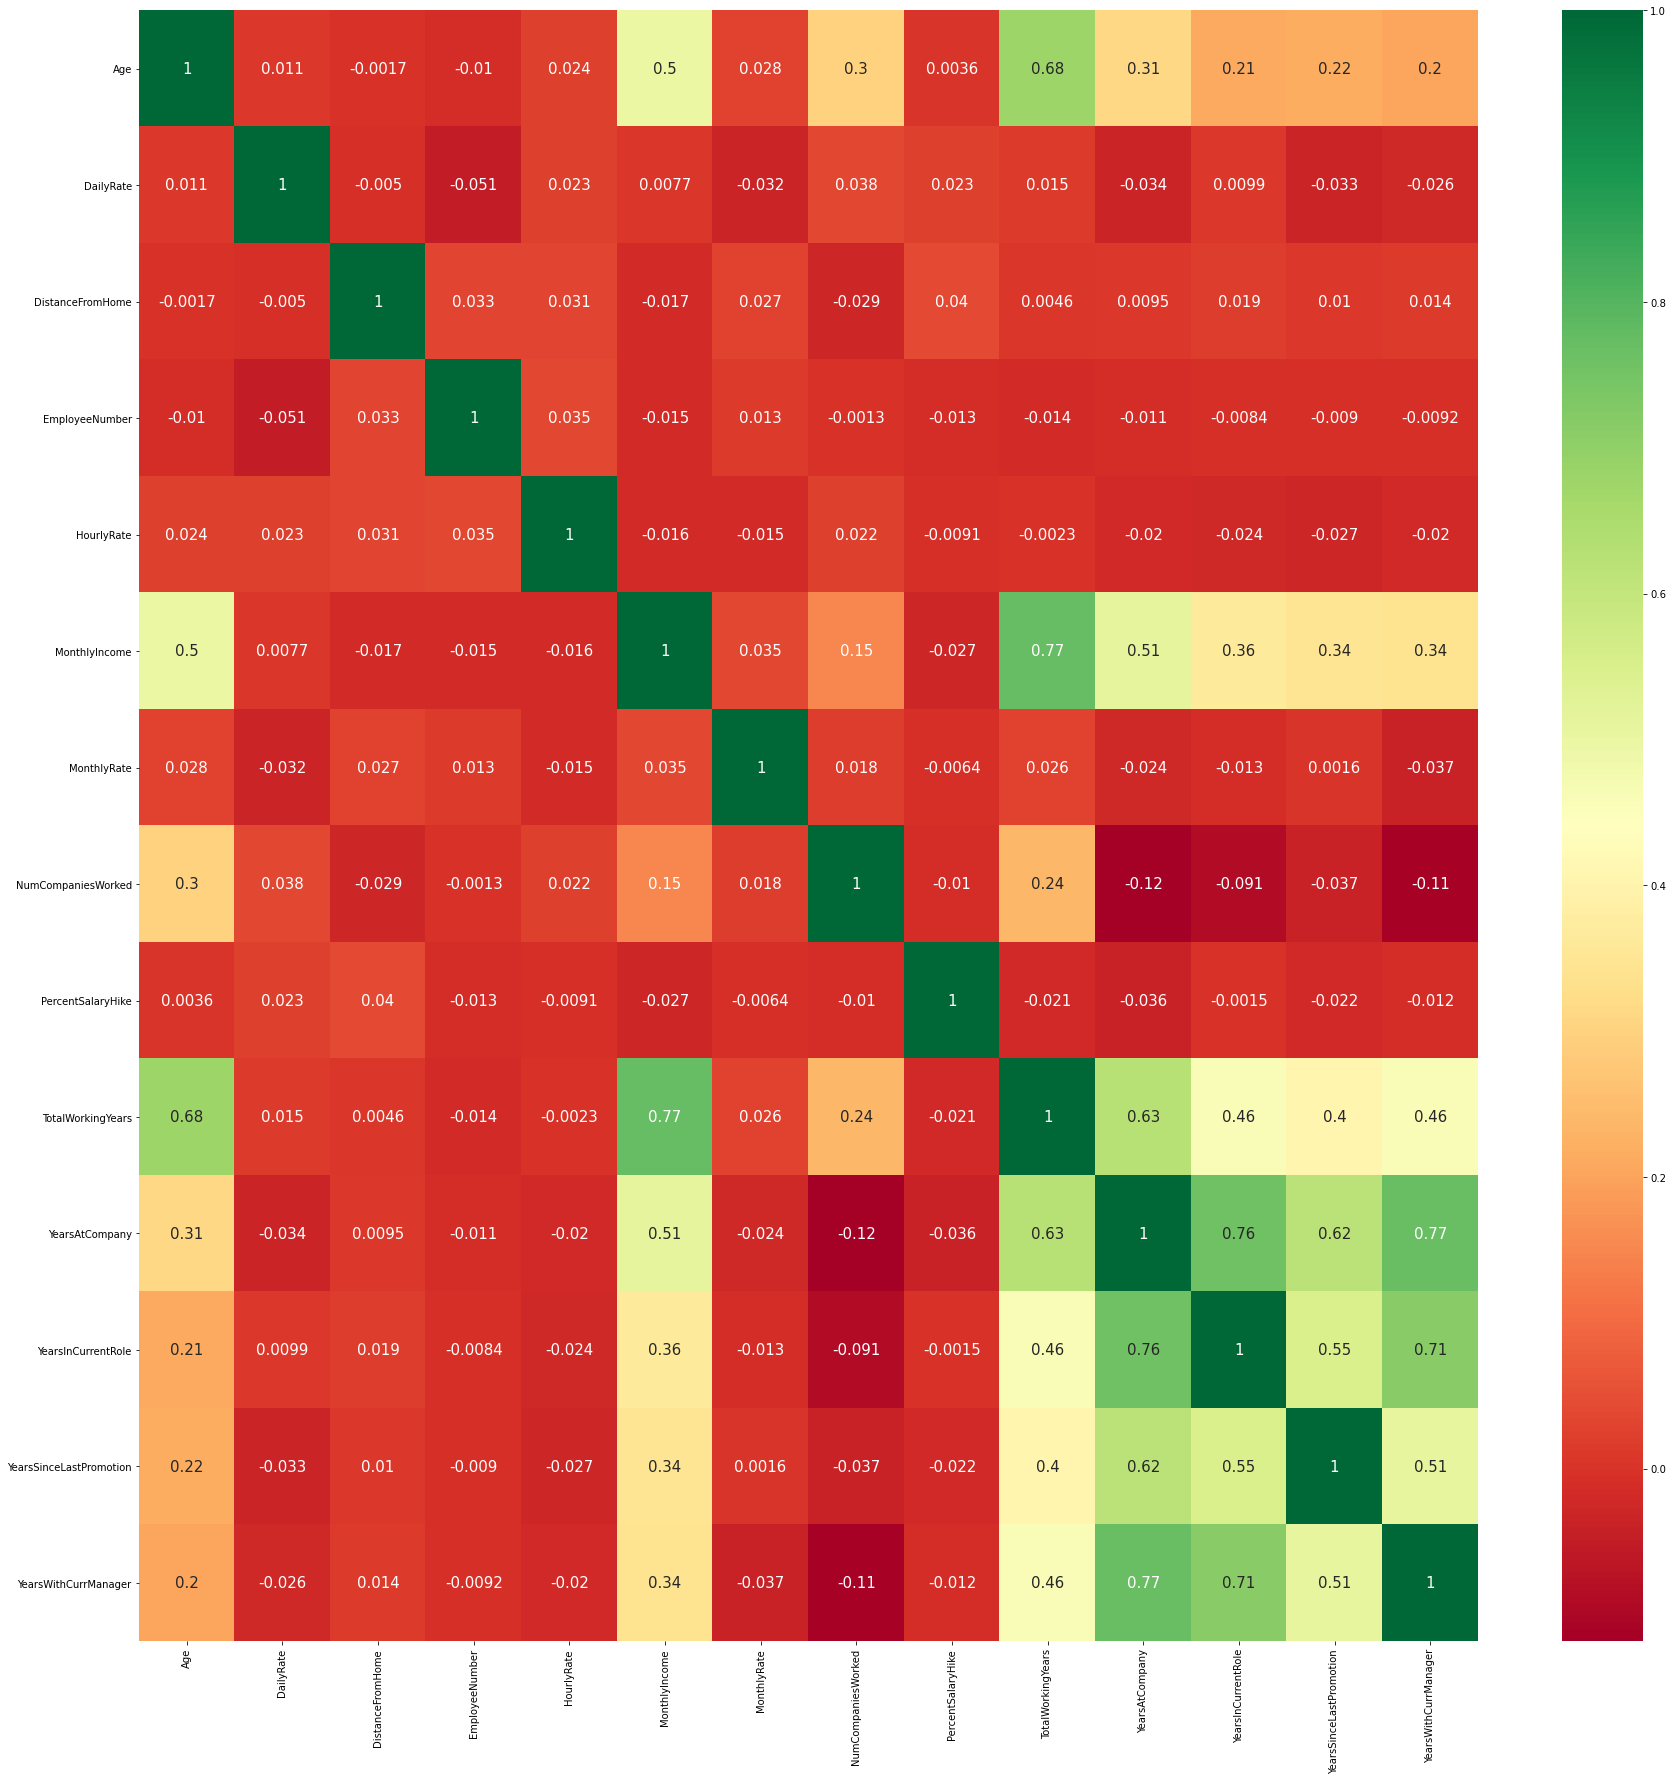

In [37]:
plt.figure(figsize=(30, 30))
sns.heatmap(data2.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

# Removing constant features

In [13]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

# Model Creation:

In [14]:
x = data.drop(columns=['Attrition'],axis=1)
y = data['Attrition']

### Balancing the data:

In [40]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

* This is an imbalance data

In [15]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote_object = SMOTE()
print('Imbalance data:',Counter(y))
x_smote , y_smote = smote_object.fit_resample(x,y)
print('balance data:',Counter(y_smote))

Imbalance data: Counter({0: 1233, 1: 237})
balance data: Counter({1: 1233, 0: 1233})


In [16]:
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_hat=dt_model.predict(x_test)

In [18]:
y_hat

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

# Evaluation Part:

In [20]:
from sklearn.metrics import f1_score
f1_score(y_test,y_hat)

0.8390243902439024

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       311
           1       0.83      0.84      0.84       306

    accuracy                           0.84       617
   macro avg       0.84      0.84      0.84       617
weighted avg       0.84      0.84      0.84       617



### To check if our  model learned accurately  :

In [22]:
y_train_pred = dt_model.predict(x_train)

In [23]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       922
           1       1.00      1.00      1.00       927

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849



### ~ It can be seen that the model trained perfectly(100%) but on testing part it is performing 83%. So we go with            the hyperparameter tuning.
### ~ So, In this decision tree model , bias is less(on training side model performing well) and variance is more(on            testing side, getting more mispredictions(errors)). this comes under overfitting.

### Hyper Parameters of Decision Tree:

* criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.


* splitter: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

* max_depth: It tells how deep the decision tree can be.The maximum depth of the tree.Deeper the tree more split it has and it captures mopre info from data.In general a DT overfits for large depth value.The tree perfectly fits the training data and fails to generalize on testing data.

* min_samples_split: The minimum number of samples required to split an internal node.Ideal range is 1 to 40.

* min_samples_leaf: The minimum number of samples required to be at a leaf node.Similarr to min sample split ,this describes the minimum number of samples at the leaf,the base of tree.Ideal range is 1 to 20.


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
hyper_params = {'criterion':('ginni','entropy'),
               'splitter':('best','random'),
               'max_depth':list(range(1,20)),
               'min_samples_split':[3,5],
               'min_samples_leaf':list(range(1,20))}

tree_classifier = DecisionTreeClassifier(random_state=8)
tree_CV = GridSearchCV(tree_classifier,hyper_params,scoring='f1',n_jobs=-1,verbose=2,cv=3)
tree_CV.fit(x_train,y_train)
best_params = tree_CV.best_params_
print("Best Hyperparameters:",best_params)

Fitting 3 folds for each of 2888 candidates, totalling 8664 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}


* GridSearch: Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 

* n_jobs: with n_jobs=1 it uses 100% of the cpu of one of the cores. Each process is run in a different core. n_jobs is an integer, specifying the maximum number of concurrently running workers. If 1 is given, no joblib parallelism is used at all, which is useful for debugging. If set to -1, all CPUs are used.

* verbose: Verbose is a general programming term for produce lots of logging output

* cv: cv: number of cross-validation you have to try for each selected set of hyperparameters.

In [27]:
tree_CV.best_score_

0.8036554363541052

### Now, Seeing the difference between the model we created first and the model we create now:

In [153]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=5,min_samples_leaf=2,splitter='best')

In [154]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [155]:
y_hat1 = dt1.predict(x_test)

In [156]:
f1_score(y_test,y_hat1)

0.833592534992224

In [157]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       311
           1       0.80      0.88      0.83       306

    accuracy                           0.83       617
   macro avg       0.83      0.83      0.83       617
weighted avg       0.83      0.83      0.83       617



In [158]:
pd.crosstab(y_test,y_hat1)

col_0,0,1
Attrition,,
0,242,69
1,38,268


### Now, model performing like this after tuning 

# Random Forest :

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
rfc_model = RandomForestClassifier(n_estimators=400)

In [216]:
rfc_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=400)

In [217]:
y_pred = rfc_model.predict(x_test)

In [218]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Attrition,,
0,288,23
1,34,272


In [219]:
f1_score(y_test,y_pred)

0.9051580698835274

In [220]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       311
           1       0.92      0.89      0.91       306

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617



# Hyperparameter Tuning in RandomForest:

* n_estimators = number of trees in the forest
* max_features = maximum number of features considered for creating the tree
* max_depth = maximum number of levels in decision tree.
* min_samples_split = minimum number of samples placed in a node before the node is split.
* min_samples_leaf = minimum number data points allowed in a leaf node.
* bootstap = method of sampling data points(with or without replacement).

In [222]:
from sklearn.model_selection import RandomizedSearchCV

In [225]:
n_estimators = [int(x) for x in np.linspace(200,2000,10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,11)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [226]:
rfc_model1 = RandomForestClassifier(random_state=42)

In [228]:
rf_cv = RandomizedSearchCV(estimator = rfc_model1 , scoring = 'f1' , param_distributions = random_grid , n_iter = 100,
                          cv = 3, verbose = 3 ,n_jobs = -1 , random_state = 42)

In [229]:
rf_cv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=3)

In [230]:
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")
 

Best paramters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100})


In [484]:
rf_final_model = RandomForestClassifier(n_estimators=775, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto', max_depth=98)
rf_final_model.fit(x_train,y_train)
y_hat = rf_final_model.predict(x_test)

In [485]:
f1_score(y_test,y_hat)

0.9108910891089109

In [486]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       311
           1       0.92      0.90      0.91       306

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617



In [487]:
pd.crosstab(y_test,y_hat)

col_0,0,1
Attrition,,
0,287,24
1,30,276
